# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [2]:
# import libraries here
import numpy as np
import pandas as pd
import zipfile

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [4]:
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`

In [5]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [6]:
# your answer here
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [8]:
temp[temp.State =="New York"]

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [10]:
round(temp[temp.State =="New York"]["Temperature"].mean(),2)

10.74

#### We want to know cities and states with Temperature above 15 degress Celcius

In [12]:
# your answer here
temp[temp.Temperature > 15]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [16]:
list(temp[temp.Temperature > 15]["City"])

['NYC', 'Hartford', 'Treton', 'Newark']

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [17]:
list(temp[(temp.Temperature > 15) & (temp.Temperature < 20) ]["City"])


['NYC', 'Hartford']

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [19]:
temp_state = temp.groupby('State', as_index=False).agg({'Temperature':[np.mean, np.std]})
temp_state.columns = ['State', 'Mean', 'Standard Deviation']
temp_state


,State,Mean,Standard Deviation
0,Connecticut,15.833333,1.964186
1,New Jersey,21.111111,1.571348
2,New York,10.740741,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [22]:
employee = pd.read_csv('employee.csv')
employee.sample()

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55


#### Explore the data types of the Temp dataframe. Comment your results

In [23]:
employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

array([[<AxesSubplot:title={'center':'Years'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

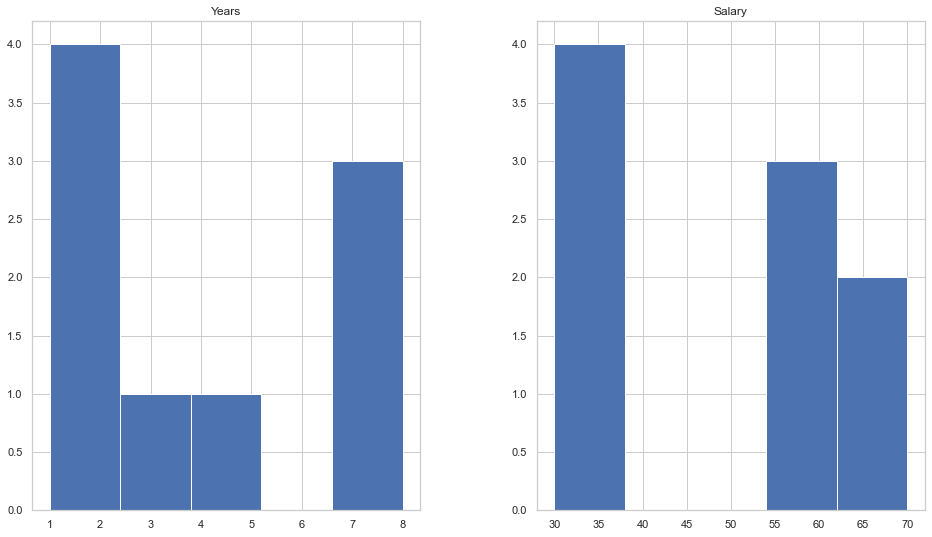

In [26]:
employee.hist(bins=5)

#### What's the average salary in this company?

In [31]:
round(employee.Salary.mean(),2)

48.89

#### What's the highest salary?

In [32]:
round(employee.Salary.max(),2)

70

#### What's the lowest salary?

In [33]:
round(employee.Salary.min(),2)


30

#### Who are the employees with the lowest salary?

In [39]:
employee.Salary

0    35
1    30
2    30
3    35
4    55
5    55
6    70
7    60
8    70
Name: Salary, dtype: int64

In [40]:
list(employee[employee.Salary==employee.Salary.min()]['Name'])

['Maria', 'David']

#### Could you give all the information about an employee called David?

In [42]:
employee[employee.Name=='David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [44]:
employee[employee.Name=='David']['Salary']

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [45]:
employee[employee.Title=='associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [46]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [48]:
employee[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [49]:
employee[(employee.Title=='associate') & (employee.Salary>55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [50]:
employee.groupby('Years', as_index=False).agg({'Salary':[np.mean]})

,Years,Salary
,,mean
0,1,35.000000
1,2,38.333333
2,3,55.000000
3,4,35.000000
4,7,60.000000
5,8,70.000000


####  What is the average Salary per title?

In [23]:
employee.groupby('Title', as_index=False).agg({'Salary':[np.mean]})

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

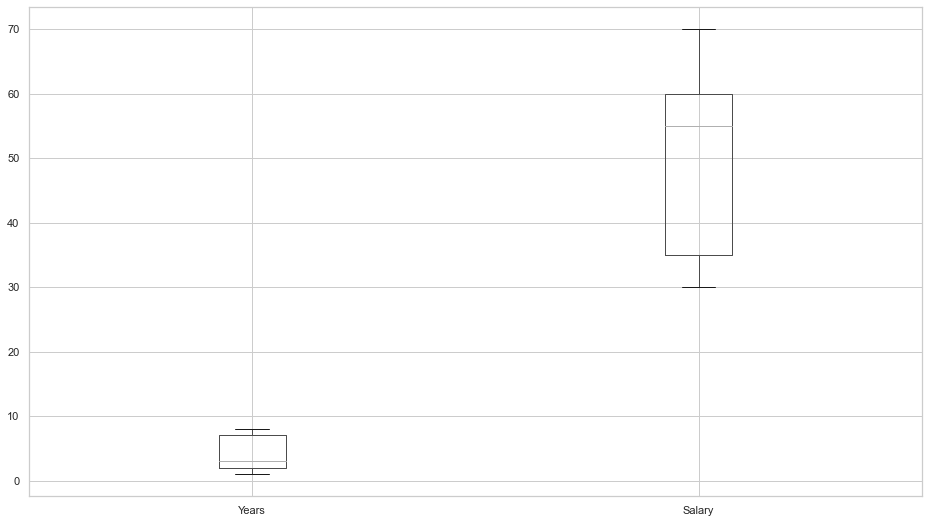

In [51]:
employee.boxplot();

In [52]:
employee.describe().loc['25%']

Years      2.0
Salary    35.0
Name: 25%, dtype: float64

In [53]:
employee.describe().loc['75%']

Years      7.0
Salary    60.0
Name: 75%, dtype: float64

#### Is the mean salary per gender different?

In [54]:
employee.groupby('Gender', as_index=False).agg({'Salary':[np.mean]})

,Gender,Salary
,,mean
0,F,47.5
1,M,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [55]:
employee.groupby('Department', as_index=False).agg({'Years':[np.min, np.mean, np.max],
                                                    'Salary':[np.min, np.mean, np.max]})

Department Years                Salary            
              amin      mean amax   amin   mean amax
0         HR     2  4.666667    8     30  45.00   70
1         IT     1  4.500000    8     30  48.75   70
2      Sales     2  2.500000    3     55  55.00   55

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [56]:
bonus = employee.groupby('Department', as_index=False).agg({'Salary':[lambda x: np.max(x)-np.min(x)]})
bonus.columns = ['Department','Difference']
bonus

,Department,Difference
0,HR,40
1,IT,40
2,Sales,0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [75]:
zf = zipfile.ZipFile('Orders.zip') #Unzipping 
orders = pd.read_csv(zf.open('Orders.csv')) #opening and save it a dataframe
zf.close() #closing it 
orders.sample()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
291709,401574,571441,22549,2011,10,1,13,picture dominoes,1,2011-10-17 13:31:00,3.29,14096,United Kingdom,3.29


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [76]:
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [77]:
orders.shape

(397924, 14)

In [78]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [79]:
round(orders.amount_spent.mean(),2)

22.39

#### What were the highest and lowest purchase prices? 

In [80]:
round(orders.amount_spent.max(),2)

168469.6

In [81]:
round(orders.amount_spent.min(),2)

0.0

#### Select all the customers we have in Spain

In [83]:
spain = orders[orders.Country=='Spain']
spain_customers = set(orders[orders.Country=='Spain']['CustomerID'])
spain_customers

{12354,
 12417,
 12421,
 12442,
 12445,
 12448,
 12450,
 12454,
 12455,
 12462,
 12484,
 12502,
 12507,
 12510,
 12538,
 12539,
 12540,
 12541,
 12544,
 12545,
 12546,
 12547,
 12548,
 12550,
 12551,
 12556,
 12557,
 12596,
 12597,
 17097}

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [84]:
len(spain_customers)

30

#### Select all the customers who have bought more than 50 items ?

In [90]:
purchasers = orders.groupby('CustomerID', as_index=False).agg({'Quantity': sum})
purchasers.columns = ['CustomerID', 'Total Quantity']
purchasers = purchasers[purchasers['Total Quantity']>50]
purchasers.sample()

,CustomerID,Total Quantity
3052,16504,524


#### Select orders from Spain that are above 50 items

In [91]:
orders[(orders.Country=='Spain') & (orders.Quantity>50)].sample()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
312656,426666,573362,22597,2011,10,7,13,musical zinc heart decoration,72,2011-10-30 13:06:00,0.29,12597,Spain,20.88


#### Select all free orders

In [92]:
orders[orders.amount_spent==0].sample()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [98]:
orders[orders.Description.apply(lambda x: 'lunch bag' in x )][:10]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
361,370,536401,20726,2010,12,3,11,lunch bag woodland,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
362,371,536401,22384,2010,12,3,11,lunch bag pink polkadot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
402,411,536404,22383,2010,12,3,11,lunch bag suki design,10,2010-12-01 11:29:00,1.65,16218,United Kingdom,16.50
403,412,536404,20728,2010,12,3,11,lunch bag cars blue,10,2010-12-01 11:29:00,1.65,16218,United Kingdom,16.50
404,413,536404,20727,2010,12,3,11,lunch bag black skull.,10,2010-12-01 11:29:00,1.65,16218,United Kingdom,16.50


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [99]:
orders[( orders.year==2011 ) & (orders.Description.apply( lambda x: 'lunch bag' in x ))][:10]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
26861,43617,540098,22383,2011,1,2,15,lunch bag suki design,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
26862,43618,540098,22382,2011,1,2,15,lunch bag spaceboy design,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
26863,43619,540098,20727,2011,1,2,15,lunch bag black skull.,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
26864,43620,540098,20727,2011,1,2,15,lunch bag black skull.,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
26902,43658,540099,20725,2011,1,2,16,lunch bag red retrospot,10,2011-01-04 16:41:00,1.65,15808,United Kingdom,16.50


#### Show the frequency distribution of the amount spent in Spain.

<AxesSubplot:>

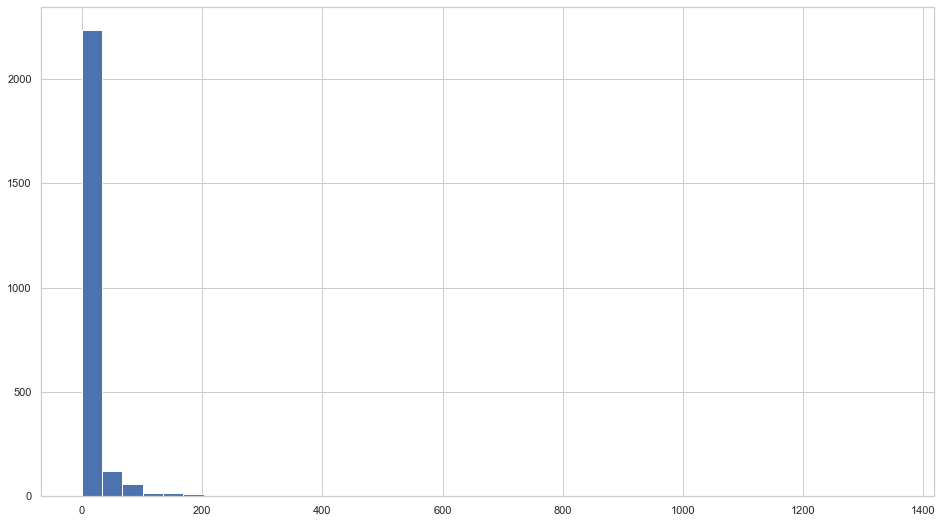

In [107]:
spain = orders[orders.Country=='Spain']
spain_amount_spent = spain['amount_spent'].value_counts()
spain.amount_spent.hist(bins=40)

#### Select all orders made in the month of August

In [111]:
august = orders[orders.month==8][:5]
august

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [113]:
august.Country.value_counts()

United Kingdom    5
Name: Country, dtype: int64

#### What's the  average amount of money spent by country

In [116]:
orders.groupby('Country', as_index=False).agg({'amount_spent': np.mean})[:10]

,Country,amount_spent
0,Australia,116.895620
1,Austria,25.624824
2,Bahrain,32.258824
3,Belgium,20.283772
4,Brazil,35.737500
5,Canada,24.280662
6,Channel Islands,27.340160
7,Cyprus,22.134169
8,Czech Republic,33.069600
9,Denmark,49.882474


#### What's the most expensive item?

In [117]:
orders.UnitPrice.max()

8142.75

#### What was the average amount spent per year ?

In [ ]:
orders.groupby('year', as_index=False).agg({'amount_spent': np.mean})